This case study is about Big Ten College Basketball. This dataset contain stats from current and previous seasons. I picked this dataset because I am very intrested in basketball and seeign how colleges team did compare to other schools really intrigued me.






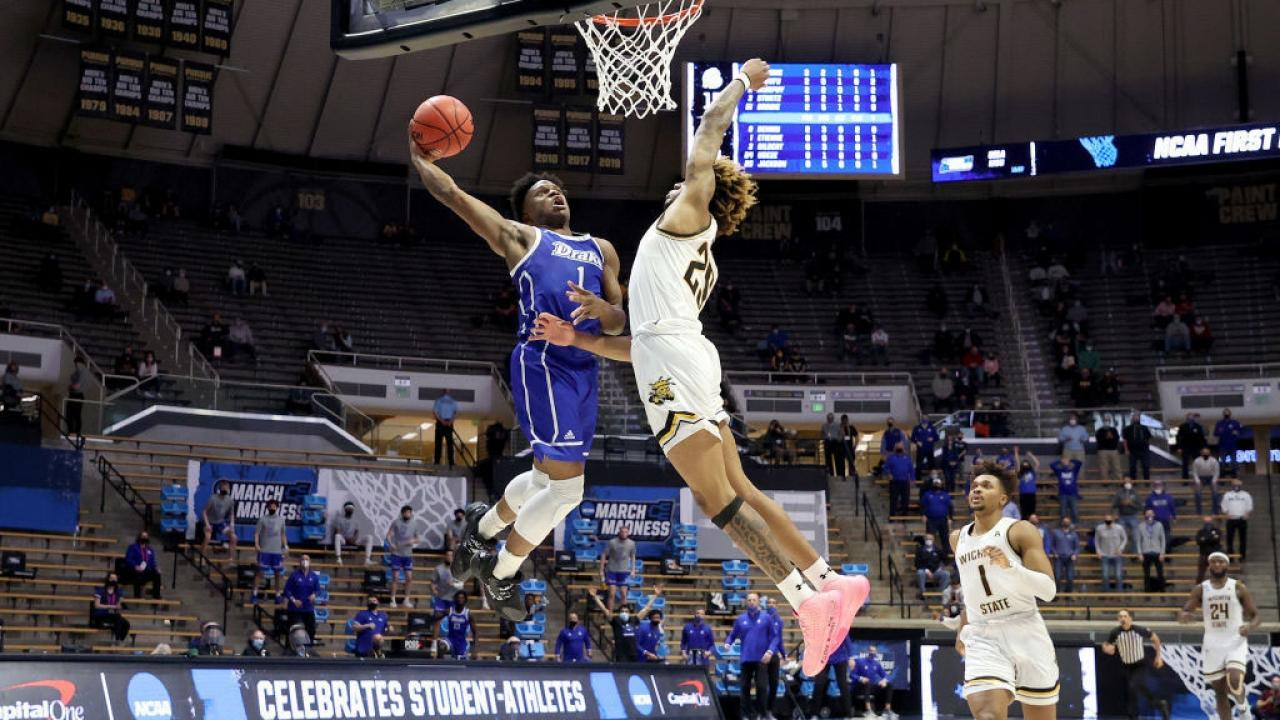

Possible Questions 


*   Who won the most Games
*   Who lost the most Games
* Which division had the most wins




In [102]:
import pandas as pd
import numpy as np
import plotly
import plotly.express as px
import plotly.graph_objects as go

Read Dataset

In [103]:
df_bb = pd.read_csv("https://github.com/s3champ/finalcasestudy/raw/main/cbb21.csv")
df_bb

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED
0,Michigan,B10,24,20,118.1,91.1,0.9521,54.9,44.9,16.3,...,24.8,28.9,24.5,53.3,42.3,38.7,33.5,66.9,7.2,1.0
1,Baylor,B12,24,22,123.2,94.5,0.9548,57.5,49.1,17.6,...,30.9,27.0,31.7,54.1,48.1,41.8,34.0,68.8,6.6,1.0
2,Illinois,B10,29,23,117.7,90.4,0.9539,55.6,46.6,18.2,...,22.2,39.2,30.5,55.3,45.4,37.6,32.7,70.7,8.9,1.0
3,Gonzaga,WCC,26,26,125.4,89.8,0.9791,61.0,47.5,16.1,...,23.4,36.7,25.9,64.0,46.8,36.5,32.5,74.6,8.5,1.0
4,Iowa,B10,29,21,123.5,95.7,0.9491,54.6,48.3,13.3,...,28.6,32.0,22.6,52.4,45.8,38.6,34.8,70.0,5.6,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,Louisiana Tech,CUSA,27,21,102.7,93.4,0.7479,50.5,45.6,18.4,...,23.4,35.3,26.4,49.7,46.4,34.6,29.6,69.6,-1.7,NaN
343,Toledo,MAC,29,21,113.3,101.8,0.7743,54.3,48.3,15.5,...,30.7,28.5,23.4,52.5,51.0,37.7,29.5,69.1,-2.1,NaN
344,UAB,CUSA,27,22,102.5,94.6,0.7153,48.6,47.0,15.6,...,25.4,29.9,27.1,49.4,46.1,31.1,32.4,67.5,-2.7,NaN
345,Eastern Kentucky,OVC,27,22,101.5,102.3,0.4749,51.2,51.0,16.6,...,30.2,25.6,32.2,49.6,51.8,35.8,33.0,75.1,-3.8,NaN


Display the number of rows and columns

In [104]:
num_rows = df_bb.shape[0]
num_cols = df_bb.shape[1]

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

Number of rows: 347
Number of columns: 22


Check the data types of each column and number of non-missing rows

In [105]:
df_bb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TEAM     347 non-null    object 
 1   CONF     347 non-null    object 
 2   G        347 non-null    int64  
 3   W        347 non-null    int64  
 4   ADJOE    347 non-null    float64
 5   ADJDE    347 non-null    float64
 6   BARTHAG  347 non-null    float64
 7   EFG_O    347 non-null    float64
 8   EFG_D    347 non-null    float64
 9   TOR      347 non-null    float64
 10  TORD     347 non-null    float64
 11  ORB      347 non-null    float64
 12  DRB      347 non-null    float64
 13  FTR      347 non-null    float64
 14  FTRD     347 non-null    float64
 15  2P_O     347 non-null    float64
 16  2P_D     347 non-null    float64
 17  3P_O     347 non-null    float64
 18  3P_D     347 non-null    float64
 19  ADJ_T    347 non-null    float64
 20  WAB      347 non-null    float64
 21  SEED     68 non-

Dropping Column That has Null Values

In [106]:
df_bb.drop(columns=['SEED'], inplace=True)


Null Checker

In [107]:
df_bb.isna().sum().sum()

0

In [108]:
df_bb.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB
0,Michigan,B10,24,20,118.1,91.1,0.9521,54.9,44.9,16.3,...,29.4,24.8,28.9,24.5,53.3,42.3,38.7,33.5,66.9,7.2
1,Baylor,B12,24,22,123.2,94.5,0.9548,57.5,49.1,17.6,...,37.5,30.9,27.0,31.7,54.1,48.1,41.8,34.0,68.8,6.6
2,Illinois,B10,29,23,117.7,90.4,0.9539,55.6,46.6,18.2,...,33.0,22.2,39.2,30.5,55.3,45.4,37.6,32.7,70.7,8.9
3,Gonzaga,WCC,26,26,125.4,89.8,0.9791,61.0,47.5,16.1,...,30.4,23.4,36.7,25.9,64.0,46.8,36.5,32.5,74.6,8.5
4,Iowa,B10,29,21,123.5,95.7,0.9491,54.6,48.3,13.3,...,30.7,28.6,32.0,22.6,52.4,45.8,38.6,34.8,70.0,5.6


In [109]:
df_bb.tail()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB
342,Louisiana Tech,CUSA,27,21,102.7,93.4,0.7479,50.5,45.6,18.4,...,27.1,23.4,35.3,26.4,49.7,46.4,34.6,29.6,69.6,-1.7
343,Toledo,MAC,29,21,113.3,101.8,0.7743,54.3,48.3,15.5,...,29.6,30.7,28.5,23.4,52.5,51.0,37.7,29.5,69.1,-2.1
344,UAB,CUSA,27,22,102.5,94.6,0.7153,48.6,47.0,15.6,...,29.0,25.4,29.9,27.1,49.4,46.1,31.1,32.4,67.5,-2.7
345,Eastern Kentucky,OVC,27,22,101.5,102.3,0.4749,51.2,51.0,16.6,...,26.8,30.2,25.6,32.2,49.6,51.8,35.8,33.0,75.1,-3.8
346,Belmont,OVC,29,26,108.5,101.6,0.6786,56.3,49.3,16.6,...,26.1,27.2,27.9,24.6,59.4,48.2,34.7,34.0,71.1,-1.1


In [110]:
df_bb.sample(10)

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB
4,Iowa,B10,29,21,123.5,95.7,0.9491,54.6,48.3,13.3,...,30.7,28.6,32.0,22.6,52.4,45.8,38.6,34.8,70.0,5.6
99,Central Connecticut,NEC,21,5,92.8,110.3,0.1213,48.5,53.9,19.7,...,23.7,32.9,28.4,30.4,48.5,54.6,32.4,35.2,70.8,-13.5
156,LIU Brooklyn,NEC,18,9,95.3,102.8,0.2959,47.3,49.9,19.3,...,32.9,28.5,31.2,28.4,50.1,50.9,28.7,32.0,73.5,-7.5
96,Saint Joseph's,A10,20,5,101.0,104.0,0.4172,48.6,53.6,18.6,...,21.8,30.9,26.7,31.4,50.1,54.1,31.4,35.1,72.5,-7.7
194,Milwaukee,Horz,22,10,101.3,107.9,0.3248,49.5,52.6,15.3,...,24.3,26.8,33.2,35.0,49.7,49.9,32.9,37.9,69.6,-8.8
317,Prairie View A&M,SWAC,21,16,94.9,101.0,0.3277,50.3,47.3,19.4,...,30.9,31.4,26.9,46.3,53.0,47.1,30.4,31.8,68.9,-3.2
167,Illinois Chicago,Horz,22,9,92.7,104.7,0.1993,49.7,48.0,18.9,...,23.7,27.6,22.8,33.8,50.2,49.1,32.7,30.1,68.6,-10.3
255,Hofstra,CAA,23,13,106.3,106.6,0.4906,50.8,51.1,17.5,...,29.3,28.9,33.2,25.8,51.7,51.4,33.0,33.8,68.4,-5.8
318,Georgia St.,SB,20,16,105.3,104.2,0.5298,51.3,48.8,16.8,...,30.9,32.5,32.6,34.6,51.0,47.2,34.5,34.1,70.8,-3.3
300,Radford,BSth,25,15,97.9,103.9,0.3351,50.5,49.9,23.2,...,33.4,24.5,40.2,25.0,52.9,46.0,30.9,37.2,63.9,-8.8


Showing how many teams there are in the Midwest divisions

In [134]:
df_mw_t = df_bb[(df_bb['CONF']=='B10') | (df_bb['CONF']=='B12')]
df_mw = df_mw_t[['TEAM', 'CONF', 'W']]
df_mw.sort_values('CONF', ascending=False, inplace=True)


df_mw

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,TEAM,CONF,W
74,Iowa St.,B12,2
245,TCU,B12,12
8,West Virginia,B12,18
9,Texas,B12,19
10,Kansas,B12,20
183,Kansas St.,B12,9
15,Oklahoma St.,B12,20
20,Texas Tech,B12,17
28,Oklahoma,B12,15
1,Baylor,B12,22


In [138]:
fig = px.sunburst(
    df_mw,
    path=['CONF','TEAM'],
    title= 'Midwest and Midsouth Confrences and the teams in each confrence',
    width = 800,
    height=800
)
fig.show()

Top teams with the best 3 point percentage in decending order

In [113]:
df_3_percentage = df_bb[['TEAM', 'CONF', 'W', '3P_O']].head(50)

df_3_percentage.sort_values('3P_O', ascending=False, inplace=True)

df_3_percentage



,TEAM,CONF,W,3P_O
1,Baylor,B12,22,41.8
12,Florida St.,ACC,16,39.0
0,Michigan,B10,20,38.7
4,Iowa,B10,21,38.6
13,Virginia,ACC,18,38.1
27,Oregon,P12,20,37.9
2,Illinois,B10,23,37.6
23,San Diego St.,MWC,23,37.5
21,BYU,WCC,20,37.3
43,UCLA,P12,17,36.7


3 Point Percentage Box Plot

In [114]:
fig = px.box(
    df_3_percentage,
    x='3P_O',
    orientation='h',
    title='3 Point Percentage Heat Map',
    height = 600
)
fig.show()

2 point percentage in descending order

In [115]:
df_2_percentage = df_bb[['TEAM', 'CONF', 'W', '2P_O']].head(50)

df_2_percentage.sort_values('2P_O', ascending=False, inplace=True)

df_2_percentage

,TEAM,CONF,W,2P_O
3,Gonzaga,WCC,26,64.0
31,Loyola Chicago,MVC,24,58.0
18,Creighton,BE,20,56.3
13,Virginia,ACC,18,55.3
2,Illinois,B10,23,55.3
35,Georgia Tech,ACC,17,54.8
21,BYU,WCC,20,54.5
45,Drake,MVC,25,54.4
1,Baylor,B12,22,54.1
48,UC Santa Barbara,BW,22,53.4


Histogram Showing the distribution of 2 point field percentage of the top 50 teams 

In [116]:
fig = px.histogram(
    df_2_percentage,
    x='2P_O',
    title = '2 Point Percentage',
    nbins=36
)
fig.show()

Filtering the teams that have more than 15 wins in the season and sorting the data in Descending order 

In [117]:
df_top_wins = df_bb[df_bb['CONF']=='B10'].head(15)
df_t = df_top_wins[['TEAM', 'CONF', 'W',]].head(50)
df_t.sort_values('W', ascending=False, inplace=True)

df_t


,TEAM,CONF,W
2,Illinois,B10,23
4,Iowa,B10,21
5,Ohio St.,B10,21
0,Michigan,B10,20
14,Purdue,B10,18
34,Wisconsin,B10,17
38,Maryland,B10,16
36,Rutgers,B10,15
40,Michigan St.,B10,15
289,Minnesota,B10,14


Line Chart showing B10 Standing

In [118]:
fig = px.bar(
    df_t,
    x='TEAM',
    y='W',
    title =' B10 Standing'
    )
fig.show()

Grouping By confrence to see how many teams are in each confrence

In [119]:
df_conf = df_bb.groupby('CONF', as_index=False).agg({'TEAM': 'count'}).head(10)
df_conf.sort_values('TEAM', ascending=False, inplace=True)
df_conf

,CONF,TEAM
1,ACC,15
0,A10,14
5,B10,14
4,Amer,11
7,BE,11
8,BSky,11
9,BSth,11
2,AE,10
6,B12,10
3,ASun,9


Pie chart showing all the divisions and how many teams are in each

In [120]:
fig = px.treemap(
    df_conf,
    path=['CONF'],
    values='TEAM',
    title = 'How many teams are in each confrence',

)

fig.show()

In [121]:
df_A = df_bb[df_bb['CONF']=='ACC'].head(15)
df_R = df_A[['TEAM', 'CONF', 'W','FTR']].head(50)

df_R.sort_values('FTR', ascending=False, inplace=True)


df_R

,TEAM,CONF,W,FTR
193,Pittsburgh,ACC,10,36.9
29,North Carolina,ACC,18,34.9
37,Virginia Tech,ACC,15,33.2
202,Miami FL,ACC,10,32.8
12,Florida St.,ACC,16,32.7
253,North Carolina St.,ACC,13,32.1
270,Louisville,ACC,13,32.1
86,Boston College,ACC,4,29.7
35,Georgia Tech,ACC,17,29.0
118,Wake Forest,ACC,6,28.5


In [122]:
fig = px.bar(
    df_R,
    title = 'Free throw Attemps by every team in the ACC',
    x='FTR',
    y='TEAM',
    template='plotly_dark',
)
fig.show()

In [143]:
df_W = df_bb[df_bb['WAB']> 0]
df_G = df_W[['TEAM', 'CONF', 'WAB',]]
df_G.sort_values('WAB', ascending=False, inplace=True)

df_G

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,TEAM,CONF,WAB
2,Illinois,B10,8.9
3,Gonzaga,WCC,8.5
0,Michigan,B10,7.2
7,Alabama,SEC,6.8
1,Baylor,B12,6.6
5,Ohio St.,B10,6.0
4,Iowa,B10,5.6
11,Arkansas,SEC,4.6
15,Oklahoma St.,B12,4.6
9,Texas,B12,4.2




A bar graph showing how many games were played and how many were won

In [144]:
fig = px.bar(
    df_G,
    x='TEAM',
    y='WAB',
    title = 'The teams that made the NCAA March Madness Tourament and how many games they were above the cut_off',
    height = 700,
)

fig.show()

Comparing how frequent a team shoot free throws compared to their wins to see if there is any influence when it comes to winning a game.

In [125]:
df_ft_wins = df_bb[['TEAM', 'W', 'FTR']].head(25)

df_ft_wins.sort_values('FTR', ascending=False, inplace=True)

df_ft_wins

,TEAM,W,FTR
8,West Virginia,18,39.4
20,Texas Tech,17,39.3
2,Illinois,23,39.2
5,Ohio St.,21,37.6
22,USC,22,37.5
3,Gonzaga,26,36.7
15,Oklahoma St.,20,36.4
17,Tennessee,18,35.1
23,San Diego St.,23,34.3
9,Texas,19,34.0


Freethrow vs Wins

In [126]:
fig = px.bar(
   df_ft_wins,
   x='W',
   y = 'TEAM',
   color = 'FTR',
   title='Wins based on Freethrow frequency',
   height = 700

)
fig.update_yaxes(categoryorder='total ascending')

fig.show()

In [148]:
df_y = df_bb[df_bb['WAB']> 0]
df_p = df_W[['TEAM', 'CONF', 'WAB',]]
df_p.sort_values('WAB', ascending=False, inplace=True)

df_p

,TEAM,CONF,WAB
2,Illinois,B10,8.9
3,Gonzaga,WCC,8.5
0,Michigan,B10,7.2
7,Alabama,SEC,6.8
1,Baylor,B12,6.6
5,Ohio St.,B10,6.0
4,Iowa,B10,5.6
11,Arkansas,SEC,4.6
15,Oklahoma St.,B12,4.6
9,Texas,B12,4.2


In [152]:
fig=px.sunburst(
    df_p,
    path=['CONF','TEAM'],
    title = 'Teams that made the NCAA Tournament and what division the came from',
    width = 800,
    height=800
)
fig.show()

Summary - Based on the findings and visuals

1.   The median 3pt percentage was 35 while the highest was 40 percent which was the number one seed school Gonzaga
2.   Aswell with 2 point percentage number 1 seed schools tended to be the most prominent
3. The teams that made the NCAA March Madness Tournament were more than 0.2 games ahead the teams that didn't make the cut-off
4. There are many divisions and it was great to be able to see how many diffrent teams and division there are in general
5. Only one school was able to go undefeated in the 2021 season but there were many different schools with great records
6. In the B1o confrence Illinois was the number 1 seed at the end of the 2021 season 
7. Freethrow attempts did not really play a huge role in the games won as there were many teams that had low freethrow attemps but still had better records than those that had higher attemps
8. There were many teams that made it to the NCAA March Madness Tournament. The group was very diverse as teams came from many different confrences

